In [1]:
##  Prediction using Decision Tree Algorithm


## For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it 
## graphically. 

## The purpose is if we feed any new data to this classifier, it would be able to 
##   predict the right class accordingly.


## Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
## Importing the dataset
iris_data = pd.read_csv('C:\\Users\\Niks PC\\Desktop\\Spark Foundation\\Iris.csv')

## Dropping the id column
iris_data.drop(['Id'],axis= 1,inplace=True)

iris_data.head(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


C:\Users\Niks PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm'>

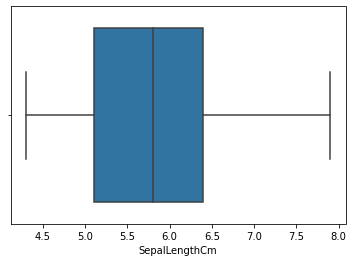

In [3]:
## Checking for the outliers
## plotting the box plot

sns.boxplot(iris_data.SepalLengthCm)  ## NO Outliers

C:\Users\Niks PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

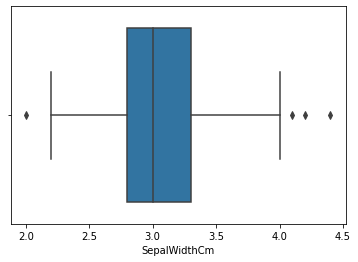

In [5]:
sns.boxplot(iris_data.SepalWidthCm)    ## Outliers are present

C:\Users\Niks PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm'>

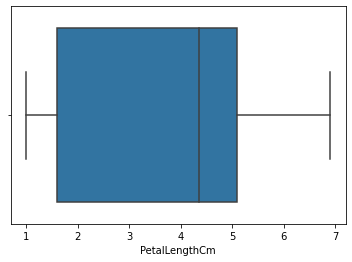

In [6]:
sns.boxplot(iris_data.PetalLengthCm)   ## NO Outliers

C:\Users\Niks PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm'>

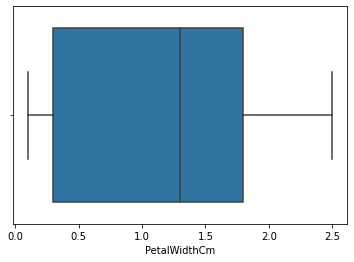

In [7]:
sns.boxplot(iris_data.PetalWidthCm)   ## NO outliers

In [8]:
## Using winsorization technique for outlier treatment

from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method='iqr', tail='both',fold=1.5,variables=['SepalWidthCm'])

iris_data['SepalWidthCm'] = winsor.fit_transform(iris_data[['SepalWidthCm']])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

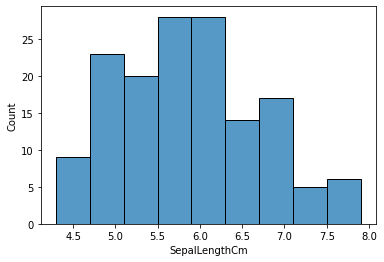

In [9]:
## Checking for the distribution of data points by plotting 
## the histograms

sns.histplot(iris_data.SepalLengthCm) 

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

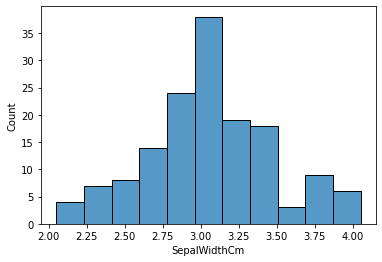

In [10]:
sns.histplot(iris_data.SepalWidthCm)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

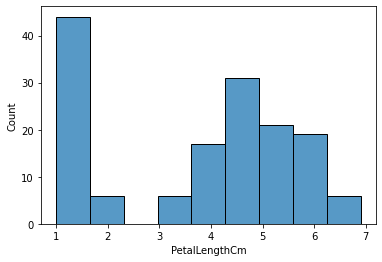

In [11]:
sns.histplot(iris_data.PetalLengthCm)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

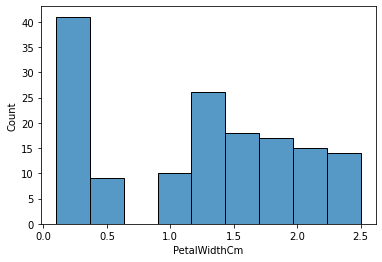

In [12]:
sns.histplot(iris_data.PetalWidthCm)

In [13]:
## Describing the dataset
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.050667,3.758667,1.198667
std,0.828066,0.423036,1.764420,0.763161
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [14]:
## Label encoding the output data
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

iris_data['Species'] = lb.fit_transform(iris_data['Species'])

In [15]:
iris_data.Species.value_counts()  
### their are Equal values of each Species

2    50
1    50
0    50
Name: Species, dtype: int64

In [16]:
## Dividing the data into X and Y

x = iris_data.iloc[:, :4]
y = iris_data.Species

In [17]:
## Splitting the dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [18]:
## Building the algorithm

from sklearn.tree import DecisionTreeClassifier as DT

help(DT)
model = DT(criterion = 'entropy')
model.fit(x_train, y_train)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

DecisionTreeClassifier(criterion='entropy')

In [19]:
# Prediction on Test Data
pred_test = model.predict(x_test)

In [20]:
## Confusion matrix 

pd.crosstab(y_test, pred_test, rownames=['Actual'], colnames=['Predictions'])

Predictions,0,1,2
Actual,,,
0,10,0,0
1,0,9,0
2,0,0,11


In [21]:
np.mean(pred_test == y_test) # Test Data Accuracy 

1.0

In [22]:
# Prediction on Train Data
pred_train = model.predict(x_train)

In [23]:
## Confusion matrix

pd.crosstab(y_train, pred_train ,rownames = ['Actual'], colnames = ['Predictions'])

Predictions,0,1,2
Actual,,,
0,40,0,0
1,0,41,0
2,0,0,39


In [24]:
np.mean(pred_train == y_train) # Train Data Accuracy

1.0